In [ ]:
pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 7.1 MB/s eta 0:00:00


In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=99974c8a0127873d1f654b308c56465fd0bd07f84fa7a52101cf6f1e3f097bc4
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
from sklearn.decomposition import PCA,KernelPCA, NMF, IncrementalPCA,SparsePCA,TruncatedSVD,FastICA
#import umap.umap_ as umap
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters
#import umap
import pandas as pd
import numpy as np
# import yfinance as yf
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
data_train=pd.read_csv('/content/drive/MyDrive/Dataset/Rida/plane/Plane_TRAIN.tsv',sep='\t')
data_test=pd.read_csv('/content/drive/MyDrive/Dataset/Rida/plane/Plane_TEST.tsv',sep='\t')

In [ ]:
data_train.head()

,1,2.4839397,2.2762865,2.0675157,1.9218926,1.7187752,1.5084285,1.3006752,1.0902862,0.88273283,...,0.71339453,0.91586026,1.1204496,1.3263464,1.5322099,1.7399188,1.9457323,2.1539857,2.3612278,2.4839393
0,4,2.603320,2.340699,2.082285,1.825624,1.567706,1.312203,1.057195,0.801716,0.546683,...,0.427274,0.676066,0.921299,1.171722,1.418897,1.663607,1.915828,2.162467,2.405276,2.605294
1,6,2.757321,2.576667,2.363323,2.151578,1.940218,1.729427,1.519429,1.309547,1.100253,...,0.954268,1.157343,1.363317,1.566326,1.769860,1.973864,2.178290,2.380841,2.584945,2.759135
2,5,0.916063,0.720145,0.522445,0.325826,0.134381,-0.054012,-0.235525,-0.409605,-0.574453,...,1.133398,0.984352,0.760642,0.541502,0.517342,0.582836,0.658641,0.757901,0.853401,0.916217
3,2,2.656142,2.388145,2.118595,1.849677,1.576579,1.310169,1.109699,0.930998,0.750668,...,0.636663,0.792403,0.986072,1.178943,1.392679,1.660325,1.929237,2.199162,2.469993,2.655524
4,6,2.716798,2.520859,2.319620,2.116441,1.913637,1.711250,1.509328,1.304647,1.103617,...,0.936229,1.143190,1.350628,1.558605,1.767164,1.976241,2.185881,2.396762,2.608897,2.714830


In [ ]:
X_train=data_train.iloc[:,1:]
y_train=data_train.iloc[:,0]
X_test=data_test.iloc[:,1:]
y_test=data_test.iloc[:,0]

In [ ]:
X_train.shape

(104, 144)

<ipython-input-25-748433ca5731>:5: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=y_train.tolist(),


[Text(0.5, 1.0, 'PCA projection')]

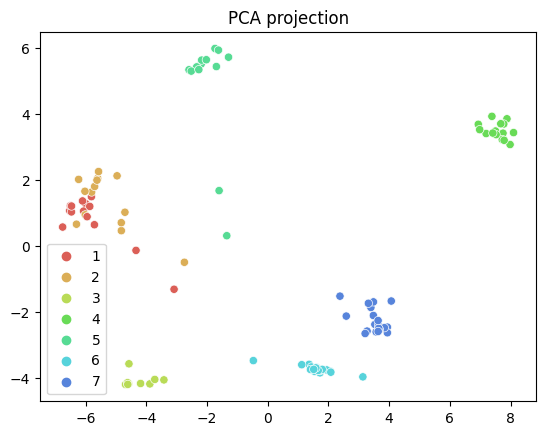

In [ ]:
pca = PCA()

pca_result = pca.fit_transform(data_train)

sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=y_train.tolist(),
                palette=sns.color_palette("hls", 10),
                data=data_train).set(title="PCA projection")



In [ ]:
kpca = KernelPCA(kernel="rbf", n_components=2, gamma=1)

z = kpca.fit_transform(data_train)

df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="KernelPCA projection")

In [ ]:
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train)

kernel_pca = KernelPCA(n_components=n_components, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)
X_kpca = kernel_pca.fit_transform(X_train)

ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X_train)

spca = SparsePCA(n_components=n_components, random_state=0)
X_spca = spca.fit_transform(X_train)

svd = TruncatedSVD(n_components=n_components, n_iter=7, random_state=42)
X_svd = svd.fit_transform(X_train)

ica = FastICA(n_components=n_components,random_state=0,whiten='unit-variance')
X_ica = ica.fit_transform(X_train)

#nmf = NMF(n_components=n_components, init='random', random_state=0)
#X_nmf = nmf.fit_transform(X_train)

umap1 = UMAP(n_neighbors=n_components, min_dist=0.3, random_state=42)
X_umap = umap1.fit_transform(X_train)

tsne = TSNE(n_components=n_components, random_state=42)
X_tsne = tsne.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
for X_transformed, title in [(X_pca, "PCA"), (X_kpca, "Kernel PCA"), (X_ipca, "Incremental PCA"), (X_spca, "Sparse PCA"), (X_svd, "SVD"), (X_ica, "ICA"), (X_umap, "UMAP"), (X_tsne, "TSNE") ]:
    plt.figure(figsize=(8, 8))
    for i, target_name in zip( [0, 1, 2], y_train):
        plt.scatter(
            X_transformed[y_train == i, 0],
            X_transformed[y_train == i, 1],
            lw=2,
            label=target_name,
        )

    #if "Incremental" in title:
    #    err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
    #    plt.title(title + " of iris dataset\nMean absolute unsigned error %.6f" % err)
    #else:
    #    plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

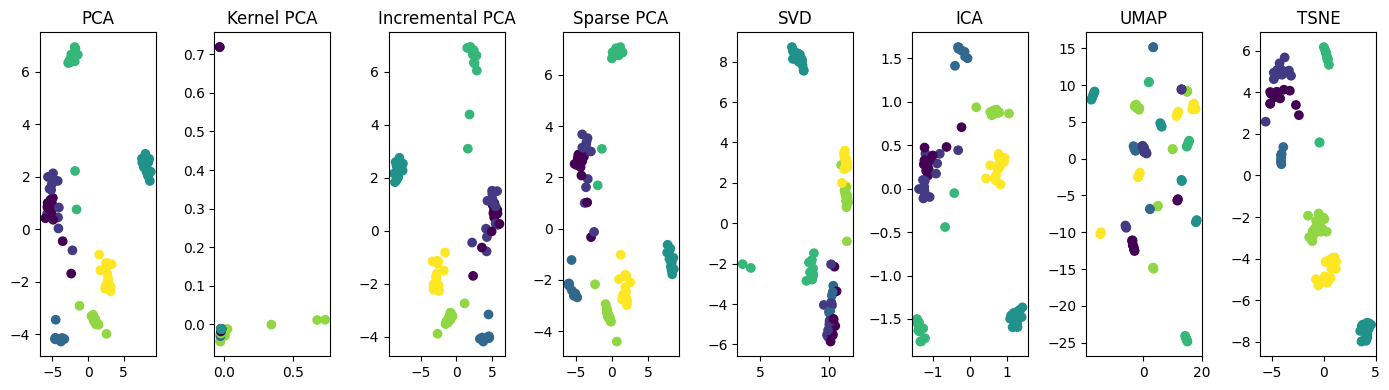

In [ ]:
#fig, (pca_ax, kpca_ax, ipca_ax, spca_ax, svd_ax, ica_ax, umap_ax, tsne_ax ) = plt.subplots( nrows=2, ncols=4, figsize=(14, 4))
fig, (pca_ax, kpca_ax, ipca_ax, spca_ax, svd_ax, ica_ax, umap_ax, tsne_ax ) = plt.subplots( nrows=1, ncols=8, figsize=(14, 4))

pca_ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
#pca_ax.set_ylabel("Principal component #1")
#pca_ax.set_xlabel("Principal component #0")
pca_ax.set_title("PCA")

kpca_ax.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_train, cmap='viridis')
#kpca_ax.set_ylabel("Principal component #1")
#kpca_ax.set_xlabel("Principal component #0")
kpca_ax.set_title("Kernel PCA")

ipca_ax.scatter(X_ipca[:, 0], X_ipca[:, 1], c=y_train, cmap='viridis')
#ipca_ax.set_ylabel("Principal component #1")
#ipca_ax.set_xlabel("Principal component #0")
ipca_ax.set_title("Incremental PCA")

spca_ax.scatter(X_spca[:, 0], X_spca[:, 1], c=y_train, cmap='viridis')
#spca_ax.set_ylabel("Principal component #1")
#spca_ax.set_xlabel("Principal component #0")
spca_ax.set_title("Sparse PCA")

svd_ax.scatter(X_svd[:, 0], X_svd[:, 1], c=y_train, cmap='viridis')
#svd_ax.set_ylabel("Component #1")
#svd_ax.set_xlabel("Component #0")
svd_ax.set_title("SVD")

ica_ax.scatter(X_ica[:, 0], X_ica[:, 1], c=y_train, cmap='viridis')
#ica_ax.set_ylabel("Component #1")
#ica_ax.set_xlabel("Component #0")
ica_ax.set_title("ICA")

umap_ax.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train, cmap='viridis')
#umap_ax.set_ylabel("Component #1")
#umap_ax.set_xlabel("Component #0")
umap_ax.set_title("UMAP")

tsne_ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis')
#tsne_ax.set_ylabel("Component #1")
#tsne_ax.set_xlabel("Component #0")
tsne_ax.set_title("TSNE")

fig.tight_layout()
plt.show()


In [ ]:
n_components = 3
pca = PCA(n_components=n_components)
X_pca3 = pca.fit_transform(X_train)

kernel_pca = KernelPCA(n_components=n_components, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)
X_kpca3 = kernel_pca.fit_transform(X_train)

ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca3 = ipca.fit_transform(X_train)

spca = SparsePCA(n_components=n_components, random_state=0)
X_spca3 = spca.fit_transform(X_train)

svd = TruncatedSVD(n_components=n_components, n_iter=7, random_state=42)
X_svd3 = svd.fit_transform(X_train)

ica = FastICA(n_components=n_components,random_state=0,whiten='unit-variance')
X_ica3 = ica.fit_transform(X_train)

umap1 = UMAP(n_neighbors=n_components, min_dist=0.3, random_state=42)
X_umap3 = umap1.fit_transform(X_train)

tsne = TSNE(n_components=n_components, random_state=42)
X_tsne3 = tsne.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Figure size 960x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

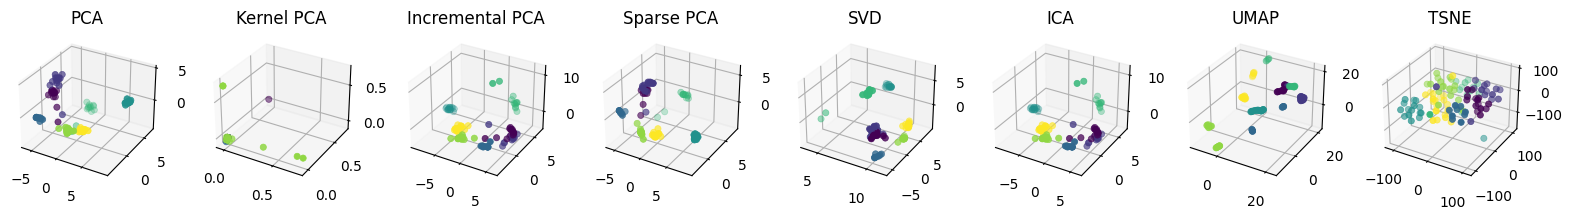

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.5))

fig = plt.figure()

fig, axs = plt.subplots(1, 8, subplot_kw={"projection": "3d"}, figsize=(16, 4))
axs[0].scatter(X_pca3[:,0], X_pca3[:,1],  X_pca3[:,2], c=y_train, cmap='viridis', linewidth=0.5)
axs[0].set_title("PCA")
axs[1].scatter(X_kpca3[:,0], X_kpca3[:,1], X_kpca3[:,2], c=y_train, cmap='viridis', linewidth=0.5)
axs[1].set_title("Kernel PCA")
axs[2].scatter(X_ipca3[:,0], X_ipca3[:,1], X_ipca3[:,2], c=y_train, cmap='viridis', linewidth=0.5)
axs[2].set_title("Incremental PCA")
axs[3].scatter(X_spca3[:,0], X_spca3[:,1], X_spca3[:,2], c=y_train, cmap='viridis', linewidth=0.5)
axs[3].set_title("Sparse PCA")
axs[4].scatter(X_svd3[:,0], X_svd3[:,1], X_svd3[:,2], c=y_train, cmap='viridis', linewidth=0.5)
axs[4].set_title("SVD")
axs[5].scatter(X_ipca3[:,0], X_ipca3[:,1], X_ipca3[:,2], c=y_train, cmap='viridis', linewidth=0.5)
axs[5].set_title("ICA")
axs[6].scatter(X_umap3[:,0], X_umap3[:,1], X_umap3[:,1], c=y_train, cmap='viridis', linewidth=0.5)
axs[6].set_title("UMAP")
axs[7].scatter(X_tsne3[:,0], X_tsne3[:,1], X_tsne3[:,2], c=y_train, cmap='viridis', linewidth=0.5)
axs[7].set_title("TSNE")
fig.tight_layout(pad=3.0)
plt.show()

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.0 MB/s et

In [3]:
from pycaret.time_series import *


ModuleNotFoundError: No module named 'pycaret'

In [2]:
exp_name = setup(data = data_train, target='1',fh = 12)

NameError: name 'setup' is not defined

In [1]:
best_model = compare_models()

NameError: name 'compare_models' is not defined

In [ ]:
arima = create_model("arima")
#plot_model(model1)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,55.0000,0.1997,0.2174,0.4393,0.6114,0.1322,0.1545,0.8627
1,67.0000,0.1185,0.1594,0.2530,0.4297,0.1612,0.1135,0.9473
2,79.0000,0.1520,0.1635,0.3233,0.4370,0.1187,0.1302,0.9523
Mean,nan,0.1567,0.1801,0.3385,0.4927,0.1374,0.1327,0.9207
SD,nan,0.0333,0.0264,0.0768,0.0840,0.0178,0.0168,0.0411


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

In [ ]:
naive = create_model("naive")
plot_model(estimator = naive, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,55.0000,1.2121,1.1150,2.6667,3.1358,0.9069,0.5233,-2.6122
1,67.0000,1.4056,1.3114,3.0000,3.5355,1.3875,0.6219,-2.5714
2,79.0000,1.0972,1.0586,2.3333,2.8284,1.3405,0.5577,-1.0000
Mean,nan,1.2383,1.1617,2.6667,3.1666,1.2116,0.5676,-2.0612
SD,nan,0.1272,0.1083,0.2722,0.2895,0.2163,0.0409,0.7506


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lasso_cds_dt = create_model("lasso_cds_dt")
plot_model(estimator = lasso_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,55.0000,0.5135,0.4839,1.1297,1.3609,0.2681,0.2637,0.3197
1,67.0000,0.6555,0.5860,1.3990,1.5800,0.5483,0.3804,0.2867
2,79.0000,0.7121,0.6407,1.5144,1.7118,0.6826,0.4454,0.2674
Mean,nan,0.6270,0.5702,1.3477,1.5509,0.4997,0.3632,0.2913
SD,nan,0.0835,0.0650,0.1612,0.1447,0.1727,0.0752,0.0216


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
xgboost_cds_dt = create_model("xgboost_cds_dt")
plot_model(xgboost_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,55.0000,0.4435,0.4767,0.9758,1.3407,0.3591,0.2918,0.3397
1,67.0000,0.1801,0.2062,0.3844,0.5559,0.1160,0.1414,0.9117
2,79.0000,0.5040,0.7262,1.0719,1.9403,0.2449,0.3380,0.0588
Mean,nan,0.3759,0.4697,0.8107,1.2789,0.2400,0.2571,0.4368
SD,nan,0.1406,0.2123,0.3040,0.5669,0.0993,0.0839,0.3549


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
ada_cds_dt = create_model("ada_cds_dt")
plot_model(ada_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,55.0000,0.3695,0.4177,0.8128,1.1746,0.3057,0.2198,0.4932
1,67.0000,0.1305,0.1070,0.2784,0.2884,0.0893,0.0952,0.9762
2,79.0000,0.4622,0.6084,0.9830,1.6255,0.2459,0.3169,0.3394
Mean,nan,0.3207,0.3777,0.6914,1.0295,0.2137,0.2106,0.6029
SD,nan,0.1398,0.2066,0.3002,0.5555,0.0912,0.0908,0.2713


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf_cds_dt = create_model("rf_cds_dt")
plot_model(rf_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,55.0000,0.2556,0.2254,0.5624,0.6339,0.1648,0.1728,0.8524
1,67.0000,0.1903,0.1615,0.4061,0.4355,0.1527,0.1553,0.9458
2,79.0000,0.3251,0.3482,0.6913,0.9305,0.1791,0.2054,0.7835
Mean,nan,0.2570,0.2451,0.5533,0.6666,0.1656,0.1778,0.8606
SD,nan,0.0550,0.0775,0.1166,0.2034,0.0108,0.0208,0.0665


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
knn_cds_dt = create_model("knn_cds_dt")
plot_model(knn_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,55.0000,0.2677,0.2282,0.5889,0.6418,0.1724,0.1995,0.8487
1,67.0000,0.1391,0.1235,0.2970,0.3328,0.0869,0.0937,0.9683
2,79.0000,0.2762,0.3450,0.5874,0.9218,0.1829,0.2214,0.7876
Mean,nan,0.2277,0.2322,0.4911,0.6321,0.1474,0.1715,0.8682
SD,nan,0.0627,0.0905,0.1373,0.2405,0.0430,0.0558,0.0751


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
exp_name = setup(data = pd.Series(X_pca.reshape(-1)),fh = 12)

,Description,Value
0,session_id,3044
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(208, 1)"
5,Transformed data shape,"(208, 1)"
6,Transformed train set shape,"(196, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
best_model = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6237,0.7390,3.0266,4.0944,1.3346,1.1819,-0.7431,0.3100
auto_arima,Auto ARIMA,0.6574,0.6765,3.1900,3.7469,1.0000,2.0000,-0.2523,0.8500
grand_means,Grand Means Forecaster,0.6605,0.6802,3.2051,3.7677,1.0034,1.9444,-0.2691,0.0667
arima,ARIMA,0.6611,0.6805,3.2083,3.7696,1.0051,1.9448,-0.2702,0.2233
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6686,0.7598,3.2526,4.2181,1.3719,1.1673,-0.8849,0.5600
theta,Theta Forecaster,0.6701,0.6923,3.2521,3.8355,1.0241,1.7963,-0.3210,0.2400
polytrend,Polynomial Trend Forecaster,0.6703,0.6927,3.2533,3.8377,1.0249,1.7922,-0.3225,0.0833
exp_smooth,Exponential Smoothing,0.6703,0.6927,3.2533,3.8377,1.0249,1.7922,-0.3225,0.1067
ets,ETS,0.6703,0.6927,3.2533,3.8377,1.0249,1.7922,-0.3225,0.2300
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.6704,0.6924,3.2535,3.8361,1.0321,1.7936,-0.3171,0.5033


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

In [ ]:
arima = create_model("arima")
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.6779,0.7054,3.2340,3.8551,1.0178,1.9648,-0.0123
1,171.0000,0.7963,0.8183,3.8911,4.5601,1.0056,1.9558,-0.2639
2,183.0000,0.5092,0.5179,2.4998,2.8937,0.9918,1.9138,-0.5342
Mean,nan,0.6611,0.6805,3.2083,3.7696,1.0051,1.9448,-0.2702
SD,nan,0.1178,0.1239,0.5683,0.6830,0.0106,0.0222,0.2131


In [ ]:
naive = create_model("naive")
plot_model(estimator = naive, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.8094,0.9128,3.8612,4.9884,2.2144,1.1868,-0.6950
1,171.0000,0.7340,0.7575,3.5869,4.2217,0.9446,1.4756,-0.0833
2,183.0000,1.6329,1.4944,8.0160,8.3494,5.0029,1.7976,-11.7736
Mean,nan,1.0588,1.0549,5.1547,5.8532,2.7206,1.4867,-4.1840
SD,nan,0.4071,0.3172,2.0263,1.7927,1.6950,0.2495,5.3725


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lasso_cds_dt = create_model("lasso_cds_dt")
plot_model(estimator = lasso_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.6764,0.7016,3.2268,3.8344,1.0908,1.7883,-0.0015
1,171.0000,0.8193,0.8480,4.0035,4.7259,1.0275,1.7967,-0.3575
2,183.0000,0.5154,0.5276,2.5301,2.9479,0.9779,1.7958,-0.5923
Mean,nan,0.6704,0.6924,3.2535,3.8361,1.0321,1.7936,-0.3171
SD,nan,0.1241,0.1310,0.6018,0.7259,0.0462,0.0038,0.2429


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
xgboost_cds_dt = create_model("xgboost_cds_dt")
plot_model(xgboost_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.4941,0.5554,2.3570,3.0352,1.0956,0.9598,0.3725
1,171.0000,0.8736,0.9704,4.2687,5.4078,1.2616,1.4300,-0.7775
2,183.0000,0.6381,0.7537,3.1322,4.2113,1.7585,1.1122,-2.2496
Mean,nan,0.6686,0.7598,3.2526,4.2181,1.3719,1.1673,-0.8849
SD,nan,0.1564,0.1695,0.7850,0.9686,0.2817,0.1959,1.0732


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
ada_cds_dt = create_model("ada_cds_dt")
plot_model(ada_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.8471,0.8626,4.0410,4.7141,1.5551,1.8687,-0.5138
1,171.0000,0.7923,0.8138,3.8716,4.5352,1.0010,1.9777,-0.2502
2,183.0000,0.6015,0.5894,2.9527,3.2934,1.3181,1.8748,-0.9874
Mean,nan,0.7470,0.7553,3.6218,4.1809,1.2914,1.9071,-0.5838
SD,nan,0.1053,0.1189,0.4781,0.6318,0.2270,0.0500,0.3050


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf_cds_dt = create_model("rf_cds_dt")
plot_model(rf_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.9988,1.1418,4.7647,6.2402,1.9209,1.3976,-1.6525
1,171.0000,0.8440,0.8588,4.1242,4.7862,1.3365,1.3929,-0.3923
2,183.0000,0.5060,0.5718,2.4839,3.1946,1.7705,1.0483,-0.8700
Mean,nan,0.7829,0.8575,3.7909,4.7403,1.6760,1.2796,-0.9716
SD,nan,0.2058,0.2327,0.9605,1.2438,0.2478,0.1636,0.5194


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
knn_cds_dt = create_model("knn_cds_dt")
plot_model(knn_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.9807,1.0107,4.6784,5.5238,2.1869,1.7797,-1.0784
1,171.0000,0.8962,0.9548,4.3794,5.3212,1.1407,1.5433,-0.7210
2,183.0000,0.4531,0.5153,2.2242,2.8793,1.0872,1.2110,-0.5190
Mean,nan,0.7767,0.8270,3.7607,4.5748,1.4716,1.5113,-0.7728
SD,nan,0.2314,0.2215,1.0932,1.2017,0.5063,0.2332,0.2313


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
exp_name = setup(data = pd.Series(X_kpca.reshape(-1)),fh = 12)

,Description,Value
0,session_id,3767
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(208, 1)"
5,Transformed data shape,"(208, 1)"
6,Transformed train set shape,"(196, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
best_model = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
snaive,Seasonal Naive Forecaster,1.4827,0.7539,0.0357,0.0832,0.7093,0.4576,-1.7268,0.1367
arima,ARIMA,1.4830,0.7538,0.0357,0.0832,0.7043,0.4596,-1.7310,0.1433
stlf,STLF,1.4902,0.7592,0.0359,0.0838,0.7077,0.5329,-2.9261,0.1133
naive,Naive Forecaster,1.5003,0.7627,0.0363,0.0843,0.7500,0.4764,-4.9977,0.0733
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.5338,0.7681,0.0371,0.0849,0.9678,0.4885,-6.7459,0.7300
theta,Theta Forecaster,1.5495,0.7678,0.0373,0.0847,1.0768,0.4902,-2.7497,0.0733
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.5604,0.7698,0.0377,0.0850,1.0307,0.5838,-4.9074,0.6333
polytrend,Polynomial Trend Forecaster,1.5701,0.7712,0.0379,0.0851,1.1376,0.5122,-3.4041,0.0433
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.5841,0.7735,0.0384,0.0855,1.0620,0.5898,-7.8585,0.8133
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,1.6186,0.7962,0.0392,0.0881,1.0874,0.6460,-14.6322,0.7267


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [ ]:
arima = create_model("arima")
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.1612,0.0415,0.0043,0.0049,0.3017,0.2729,-2.8883
1,171.0000,0.1553,0.0387,0.0039,0.0044,0.2672,0.2646,-2.1198
2,183.0000,4.1326,2.1813,0.0989,0.2402,1.5439,0.8414,-0.1849
Mean,nan,1.4830,0.7538,0.0357,0.0832,0.7043,0.4596,-1.7310
SD,nan,1.8735,1.0094,0.0447,0.1110,0.5939,0.2700,1.1374


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
naive = create_model("naive")
plot_model(estimator = naive, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.3421,0.0806,0.0092,0.0095,0.6603,0.4799,-13.6676
1,171.0000,0.1056,0.0321,0.0027,0.0037,0.1545,0.1803,-1.1467
2,183.0000,4.0531,2.1754,0.0970,0.2396,1.4352,0.7691,-0.1786
Mean,nan,1.5003,0.7627,0.0363,0.0843,0.7500,0.4764,-4.9977
SD,nan,1.8077,0.9992,0.0430,0.1098,0.5266,0.2404,6.1433


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lasso_cds_dt = create_model("lasso_cds_dt")
plot_model(estimator = lasso_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.8670,0.2291,0.0234,0.0272,1.6670,0.9706,-117.6345
1,171.0000,0.9709,0.2617,0.0246,0.0299,1.7130,1.0319,-141.9316
2,183.0000,4.7744,2.1698,0.1143,0.2389,4.3636,1.3630,-0.1725
Mean,nan,2.2041,0.8869,0.0541,0.0986,2.5812,1.1219,-86.5795
SD,nan,1.8180,0.9073,0.0426,0.0992,1.2605,0.1724,61.8990


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
xgboost_cds_dt = create_model("xgboost_cds_dt")
plot_model(xgboost_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.3888,0.0947,0.0105,0.0112,0.7431,0.5255,-19.2683
1,171.0000,0.1144,0.0292,0.0029,0.0033,0.2081,0.1941,-0.7854
2,183.0000,4.0981,2.1804,0.0981,0.2401,1.9520,0.7458,-0.1840
Mean,nan,1.5338,0.7681,0.0371,0.0849,0.9678,0.4885,-6.7459
SD,nan,1.8167,0.9990,0.0432,0.1098,0.7295,0.2268,8.8581


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
ada_cds_dt = create_model("ada_cds_dt")
plot_model(ada_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.2416,0.2972,0.0335,0.0352,2.3478,1.1612,-198.5444
1,171.0000,1.0947,0.2561,0.0277,0.0292,1.8827,1.1282,-135.9550
2,183.0000,5.3610,2.2867,0.1283,0.2518,7.8372,1.3715,-0.3022
Mean,nan,2.5658,0.9467,0.0632,0.1054,4.0226,1.2203,-111.6005
SD,nan,1.9774,0.9477,0.0461,0.1035,2.7040,0.1077,82.7439


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf_cds_dt = create_model("rf_cds_dt")
plot_model(rf_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.4080,0.0985,0.0110,0.0117,0.7891,0.5579,-20.9061
1,171.0000,0.1590,0.0409,0.0040,0.0047,0.2995,0.2497,-2.4848
2,183.0000,4.1852,2.1810,0.1002,0.2402,2.0975,0.9618,-0.1846
Mean,nan,1.5841,0.7735,0.0384,0.0855,1.0620,0.5898,-7.8585
SD,nan,1.8421,0.9956,0.0438,0.1094,0.7590,0.2916,9.2737


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
knn_cds_dt = create_model("knn_cds_dt")
plot_model(knn_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.4091,0.0996,0.0110,0.0118,0.7975,0.5395,-21.4268
1,171.0000,0.3777,0.0893,0.0096,0.0102,0.6805,0.4861,-15.6576
2,183.0000,4.3211,2.2124,0.1034,0.2436,2.7372,0.9018,-0.2189
Mean,nan,1.7026,0.8004,0.0413,0.0885,1.4050,0.6425,-12.4345
SD,nan,1.8516,0.9984,0.0439,0.1097,0.9432,0.1846,8.9530


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
exp_name = setup(data = pd.Series(X_spca.reshape(-1)),fh = 12)

,Description,Value
0,session_id,3417
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(208, 1)"
5,Transformed data shape,"(208, 1)"
6,Transformed train set shape,"(196, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
best_model = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
auto_arima,Auto ARIMA,0.6080,0.6571,2.9424,3.6121,1.0000,2.0000,-0.3028,0.5400
arima,ARIMA,0.6119,0.6632,2.9614,3.6459,1.7440,1.9079,-0.3311,0.1200
grand_means,Grand Means Forecaster,0.6143,0.6624,2.9730,3.6413,1.7586,1.9562,-0.3297,0.0533
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.6294,0.6826,3.0461,3.7523,5.2154,1.7872,-0.4059,0.2667
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.6329,0.6798,3.0639,3.7374,1.8254,1.8784,-0.4661,0.3333
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.6329,0.6798,3.0639,3.7374,1.8254,1.8784,-0.4661,0.2633
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.6329,0.6798,3.0639,3.7374,1.8254,1.8784,-0.4661,0.7367
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.6345,0.6796,3.0715,3.7362,1.8591,1.8866,-0.4661,0.4167
theta,Theta Forecaster,0.6352,0.6792,3.0750,3.7339,1.4973,1.8744,-0.4718,0.0467
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.6353,0.6794,3.0753,3.7350,1.8745,1.8861,-0.4664,0.2667


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

In [ ]:
arima = create_model("arima")
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.6282,0.6807,3.0120,3.7173,3.2104,1.9240,-0.0361
1,171.0000,0.7110,0.7967,3.4574,4.3927,1.0050,1.9452,-0.2534
2,183.0000,0.4965,0.5123,2.4149,2.8276,1.0166,1.8545,-0.7039
Mean,nan,0.6119,0.6632,2.9614,3.6459,1.7440,1.9079,-0.3311
SD,nan,0.0883,0.1167,0.4271,0.6409,1.0369,0.0387,0.2781


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
naive = create_model("naive")
plot_model(estimator = naive, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.9457,1.0260,4.5340,5.6032,88.5733,1.4247,-1.3540
1,171.0000,0.6935,0.7117,3.3724,3.9240,1.5748,1.3256,-0.0002
2,183.0000,1.7536,1.5945,8.5295,8.8003,8.7882,1.8516,-15.5043
Mean,nan,1.1309,1.1107,5.4786,6.1092,32.9787,1.5340,-5.6195
SD,nan,0.4522,0.3654,2.2088,2.0226,39.4214,0.2282,7.0114


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lasso_cds_dt = create_model("lasso_cds_dt")
plot_model(estimator = lasso_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.6307,0.6811,3.0239,3.7193,3.0319,1.9499,-0.0372
1,171.0000,0.7025,0.7802,3.4161,4.3018,0.9910,1.8633,-0.2021
2,183.0000,0.5730,0.5768,2.7870,3.1836,1.6051,1.8450,-1.1599
Mean,nan,0.6354,0.6794,3.0756,3.7349,1.8760,1.8861,-0.4664
SD,nan,0.0530,0.0830,0.2594,0.4566,0.8549,0.0457,0.4950


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
xgboost_cds_dt = create_model("xgboost_cds_dt")
plot_model(xgboost_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.4413,0.5614,2.1159,3.0660,115.6563,0.8169,0.2952
1,171.0000,0.9606,1.0686,4.6715,5.8921,1.9398,1.5100,-1.2551
2,183.0000,0.5121,0.5739,2.4910,3.1671,2.6982,1.3611,-1.1377
Mean,nan,0.6380,0.7346,3.0928,4.0417,40.0981,1.2293,-0.6992
SD,nan,0.2300,0.2362,1.1268,1.3090,53.4286,0.2979,0.7048


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
ada_cds_dt = create_model("ada_cds_dt")
plot_model(ada_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.7162,0.7544,3.4338,4.1200,23.5316,1.6641,-0.2727
1,171.0000,0.7421,0.8725,3.6087,4.8107,1.1635,1.2774,-0.5034
2,183.0000,0.7128,0.7178,3.4672,3.9616,2.9675,1.6796,-2.3445
Mean,nan,0.7237,0.7816,3.5032,4.2974,9.2209,1.5404,-1.0402
SD,nan,0.0131,0.0660,0.0758,0.3687,10.1459,0.1861,0.9271


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf_cds_dt = create_model("rf_cds_dt")
plot_model(rf_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.1328,1.2075,5.4311,6.5942,154.5607,1.2760,-2.2603
1,171.0000,0.8618,0.9639,4.1906,5.3149,1.8101,1.2587,-0.8350
2,183.0000,0.5656,0.6423,2.7514,3.5447,1.8650,1.4478,-1.6777
Mean,nan,0.8534,0.9379,4.1244,5.1513,52.7453,1.3275,-1.5910
SD,nan,0.2316,0.2315,1.0950,1.2503,71.9944,0.0853,0.5851


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
knn_cds_dt = create_model("knn_cds_dt")
plot_model(knn_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.8414,0.8868,4.0341,4.8427,111.0762,1.5447,-0.7583
1,171.0000,0.8297,0.9713,4.0346,5.3556,1.3470,1.4888,-0.8632
2,183.0000,0.7575,0.8217,3.6845,4.5351,1.7481,1.6094,-3.3831
Mean,nan,0.8095,0.8933,3.9178,4.9111,38.0571,1.5476,-1.6682
SD,nan,0.0371,0.0612,0.1649,0.3384,51.6326,0.0493,1.2134


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
exp_name = setup(data = pd.Series(X_svd.reshape(-1)),fh = 12)


best_model = compare_models()

arima = create_model("arima")
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

naive = create_model("naive")
plot_model(estimator = naive, plot = 'forecast', data_kwargs = {'fh' : 12})


lasso_cds_dt = create_model("lasso_cds_dt")
plot_model(estimator = lasso_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 12})

xgboost_cds_dt = create_model("xgboost_cds_dt")
plot_model(xgboost_cds_dt)


ada_cds_dt = create_model("ada_cds_dt")
plot_model(ada_cds_dt)


rf_cds_dt = create_model("rf_cds_dt")
plot_model(rf_cds_dt)

knn_cds_dt = create_model("knn_cds_dt")
plot_model(knn_cds_dt)


,Description,Value
0,session_id,6204
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(208, 1)"
5,Transformed data shape,"(208, 1)"
6,Transformed train set shape,"(196, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.8072,0.7645,2.4786,3.5513,0.5593,0.6507,0.5360,0.5533
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.8233,0.6712,2.5506,3.1316,0.5864,0.9058,0.6617,0.2900
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8233,0.6712,2.5506,3.1316,0.5864,0.9058,0.6617,0.2833
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8233,0.6712,2.5506,3.1316,0.5864,0.9058,0.6617,0.2900
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.8234,0.6712,2.5506,3.1316,0.5864,0.9058,0.6617,0.3367
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8238,0.6718,2.5517,3.1342,0.5851,0.9061,0.6600,0.2900
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.8238,0.6718,2.5517,3.1342,0.5851,0.9061,0.6600,0.2833
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.8243,0.6723,2.5533,3.1365,0.5868,0.9059,0.6598,0.4667
exp_smooth,Exponential Smoothing,0.8251,0.6725,2.5560,3.1379,0.5873,0.9180,0.6614,0.2033
ets,ETS,0.8251,0.6725,2.5560,3.1379,0.5873,0.9179,0.6614,0.1433


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.0094,0.8460,3.1526,3.9640,0.6986,0.9165,0.6470
1,171.0000,1.3633,1.2781,4.0882,5.8310,0.7692,0.7382,-0.2518
2,183.0000,0.7456,0.5823,2.4137,2.8227,0.8635,0.6911,0.7873
Mean,nan,1.0394,0.9021,3.2182,4.2059,0.7771,0.7819,0.3942
SD,nan,0.2531,0.2868,0.6852,1.2400,0.0675,0.0971,0.4604


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,2.0637,1.4647,6.4455,6.8633,1.0335,1.5332,-0.0582
1,171.0000,3.0378,2.2716,9.1099,10.3633,1.3234,1.6015,-2.9542
2,183.0000,2.4831,1.9997,8.0389,9.6937,1.3547,1.5942,-1.5079
Mean,nan,2.5282,1.9120,7.8648,8.9734,1.2372,1.5763,-1.5068
SD,nan,0.3990,0.3352,1.0947,1.5169,0.1446,0.0306,1.1823


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.6991,0.5681,2.1835,2.6621,0.5215,0.9115,0.8408
1,171.0000,1.1097,0.9620,3.3278,4.3886,0.6121,0.8908,0.2909
2,183.0000,0.6612,0.4835,2.1406,2.3441,0.6258,0.9151,0.8534
Mean,nan,0.8233,0.6712,2.5506,3.1316,0.5864,0.9058,0.6617
SD,nan,0.2031,0.2085,0.5498,0.8983,0.0463,0.0107,0.2622


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.8345,0.9316,2.6063,4.3653,0.6342,0.5829,0.5719
1,171.0000,1.2916,1.0954,3.8734,4.9972,0.7214,0.9815,0.0806
2,183.0000,0.2954,0.2664,0.9563,1.2916,0.3223,0.3876,0.9555
Mean,nan,0.8072,0.7645,2.4786,3.5513,0.5593,0.6507,0.5360
SD,nan,0.4072,0.3584,1.1943,1.6186,0.1713,0.2472,0.3581


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.9040,0.7672,2.8233,3.5948,0.6463,0.9329,0.7097
1,171.0000,1.3728,1.3295,4.1169,6.0654,0.7804,0.7269,-0.3545
2,183.0000,0.9234,0.7316,2.9895,3.5467,1.0716,0.7198,0.6643
Mean,nan,1.0667,0.9428,3.3099,4.4023,0.8328,0.7932,0.3398
SD,nan,0.2166,0.2738,0.5746,1.1761,0.1775,0.0988,0.4913


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.9041,0.7701,2.8238,3.6086,0.6198,0.9005,0.7074
1,171.0000,1.3097,1.1131,3.9275,5.0780,0.7579,1.0658,0.0506
2,183.0000,1.0696,0.8045,3.4627,3.9001,0.8020,1.0913,0.5940
Mean,nan,1.0945,0.8959,3.4047,4.1956,0.7266,1.0192,0.4507
SD,nan,0.1665,0.1542,0.4525,0.6352,0.0776,0.0846,0.2867


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.9998,0.8238,3.1227,3.8601,0.6950,0.9229,0.6653
1,171.0000,1.1642,1.0937,3.4912,4.9895,0.5673,0.8363,0.0834
2,183.0000,0.6576,0.6185,2.1290,2.9980,0.9904,0.6171,0.7601
Mean,nan,0.9406,0.8453,2.9143,3.9492,0.7509,0.7921,0.5029
SD,nan,0.2110,0.1946,0.5753,0.8154,0.1772,0.1287,0.2992


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
exp_name = setup(data = pd.Series(X_ipca.reshape(-1)),fh = 12)


best_model = compare_models()

arima = create_model("arima")
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

naive = create_model("naive")
plot_model(estimator = naive, plot = 'forecast', data_kwargs = {'fh' : 12})


lasso_cds_dt = create_model("lasso_cds_dt")
plot_model(estimator = lasso_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 12})

xgboost_cds_dt = create_model("xgboost_cds_dt")
plot_model(xgboost_cds_dt)


ada_cds_dt = create_model("ada_cds_dt")
plot_model(ada_cds_dt)


rf_cds_dt = create_model("rf_cds_dt")
plot_model(rf_cds_dt)

knn_cds_dt = create_model("knn_cds_dt")
plot_model(knn_cds_dt)


,Description,Value
0,session_id,1167
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(208, 1)"
5,Transformed data shape,"(208, 1)"
6,Transformed train set shape,"(196, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
polytrend,Polynomial Trend Forecaster,0.7751,0.7866,3.1388,3.8068,2.4013,1.4381,-0.3319,0.1033
auto_arima,Auto ARIMA,0.7767,0.7529,3.1430,3.6424,2.4901,1.5977,-0.2208,12.8633
theta,Theta Forecaster,0.7820,0.7841,3.1667,3.7948,2.3774,1.4861,-0.3258,0.0833
croston,Croston,0.7928,0.8182,3.2124,3.9613,4.2123,1.2267,-0.4596,0.0733
grand_means,Grand Means Forecaster,0.7941,0.7846,3.2134,3.7961,1.1421,1.9623,-0.3453,0.1033
ets,ETS,0.8300,0.8770,3.3597,4.2431,2.3307,1.4244,-0.6255,0.3933
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.8438,0.8308,3.4150,4.0190,3.6219,1.4934,-0.4991,1.0333
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8438,0.8308,3.4150,4.0190,3.6215,1.4935,-0.4991,1.7433
exp_smooth,Exponential Smoothing,0.8477,0.8522,3.4311,4.1233,2.3474,1.5848,-0.5654,0.2000
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.8517,0.8577,3.4471,4.1501,2.6564,1.5756,-0.5966,0.4967


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.0221,0.9897,4.1205,4.7795,6.8843,1.3379,-1.8490
1,171.0000,1.1511,1.1391,4.6485,5.4963,1.5653,1.4740,-0.4392
2,183.0000,1.0593,0.9586,4.3234,4.6701,15.7989,1.5155,-1.9161
Mean,nan,1.0775,1.0291,4.3641,4.9820,8.0828,1.4424,-1.4014
SD,nan,0.0542,0.0788,0.2175,0.3664,5.8723,0.0759,0.6809


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.5240,1.4008,6.1434,6.7646,6.2064,1.7888,-4.7070
1,171.0000,0.9737,0.9529,3.9323,4.5979,0.9875,1.9234,-0.0072
2,183.0000,1.6941,1.5262,6.9142,7.4354,23.1718,1.6471,-6.3921
Mean,nan,1.3973,1.2933,5.6633,6.2660,10.1219,1.7864,-3.7021
SD,nan,0.3074,0.2461,1.2638,1.2109,9.4705,0.1128,2.7017


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.8619,0.8677,3.4745,4.1901,2.6992,1.5999,-1.1896
1,171.0000,1.0141,1.0405,4.0950,5.0202,1.1140,1.6150,-0.2007
2,183.0000,0.6863,0.6459,2.8009,3.1466,5.4938,1.5680,-0.3238
Mean,nan,0.8541,0.8513,3.4568,4.1190,3.1023,1.5943,-0.5714
SD,nan,0.1339,0.1615,0.5285,0.7665,1.8106,0.0196,0.4400


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.9258,0.9343,3.7323,4.5120,3.7283,1.5713,-1.5390
1,171.0000,1.1418,1.0953,4.6109,5.2850,1.2645,1.6258,-0.3307
2,183.0000,1.0403,0.9948,4.2456,4.8463,18.7355,1.7887,-2.1403
Mean,nan,1.0360,1.0081,4.1963,4.8811,7.9095,1.6620,-1.3367
SD,nan,0.0882,0.0664,0.3604,0.3165,7.7210,0.0924,0.7525


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.7803,0.7887,3.1457,3.8089,3.6065,1.3330,-0.8093
1,171.0000,0.9741,0.9985,3.9336,4.8176,1.0524,1.4020,-0.1057
2,183.0000,0.8009,0.7717,3.2686,3.7594,11.5045,1.6247,-0.8897
Mean,nan,0.8518,0.8529,3.4493,4.1286,5.3878,1.4532,-0.6016
SD,nan,0.0869,0.1031,0.3461,0.4876,4.4491,0.1245,0.3522


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.8858,0.8794,3.5709,4.2470,2.9723,1.5231,-1.2494
1,171.0000,0.9819,0.9577,3.9653,4.6208,1.0738,1.6331,-0.0173
2,183.0000,0.8287,0.7757,3.3820,3.7788,10.5783,1.7395,-0.9093
Mean,nan,0.8988,0.8709,3.6394,4.2155,4.8748,1.6319,-0.7253
SD,nan,0.0632,0.0746,0.2430,0.3445,4.1068,0.0883,0.5196


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.0784,1.0139,4.3472,4.8964,4.5639,1.5876,-1.9900
1,171.0000,0.9761,0.9453,3.9420,4.5609,1.0858,1.4572,0.0090
2,183.0000,0.6599,0.6244,2.6933,3.0420,8.2173,1.4940,-0.2373
Mean,nan,0.9048,0.8612,3.6608,4.1664,4.6223,1.5129,-0.7394
SD,nan,0.1781,0.1698,0.7039,0.8068,2.9117,0.0549,0.8900


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
exp_name = setup(data = pd.Series(X_ica.reshape(-1)),fh = 12)


best_model = compare_models()

arima = create_model("arima")
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

naive = create_model("naive")
plot_model(estimator = naive, plot = 'forecast', data_kwargs = {'fh' : 12})


lasso_cds_dt = create_model("lasso_cds_dt")
plot_model(estimator = lasso_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 12})

xgboost_cds_dt = create_model("xgboost_cds_dt")
plot_model(xgboost_cds_dt)


ada_cds_dt = create_model("ada_cds_dt")
plot_model(ada_cds_dt)


rf_cds_dt = create_model("rf_cds_dt")
plot_model(rf_cds_dt)

knn_cds_dt = create_model("knn_cds_dt")
plot_model(knn_cds_dt)


,Description,Value
0,session_id,5938
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(208, 1)"
5,Transformed data shape,"(208, 1)"
6,Transformed train set shape,"(196, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
grand_means,Grand Means Forecaster,0.8440,0.7595,0.8629,0.9896,0.9883,1.8894,-0.4443,0.0733
auto_arima,Auto ARIMA,0.8531,0.7720,0.8723,1.0058,1.1501,1.6305,-0.5070,8.3967
theta,Theta Forecaster,0.8759,0.7694,0.8957,1.0025,1.3395,1.6592,-0.5962,0.0800
polytrend,Polynomial Trend Forecaster,0.8840,0.7749,0.9040,1.0097,1.3687,1.6547,-0.6365,0.0467
croston,Croston,0.8872,0.8364,0.9070,1.0896,1.3045,1.3393,-0.7391,0.0500
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.9066,0.8364,0.9271,1.0898,1.9501,1.4489,-0.8434,0.7000
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.9071,0.8247,0.9276,1.0746,1.7729,1.4757,-0.7803,0.9400
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.9138,0.8526,0.9345,1.1110,1.2662,1.4261,-0.9222,0.9467
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.9151,0.8146,0.9358,1.0614,1.7744,1.5574,-0.7732,0.5100
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.9151,0.8146,0.9358,1.0614,1.7744,1.5574,-0.7732,0.5000


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.9428,0.9847,0.9654,1.2829,1.7323,1.2217,-1.4152
1,171.0000,1.0653,1.0241,1.0863,1.3329,3.5996,1.3837,-0.6255
2,183.0000,1.3047,1.1591,1.3368,1.5124,2.4544,1.6028,-4.6878
Mean,nan,1.1043,1.0560,1.1295,1.3761,2.5954,1.4027,-2.2428
SD,nan,0.1503,0.0747,0.1547,0.0986,0.7688,0.1562,1.7586


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.4638,1.3134,1.4988,1.7111,1.8454,1.5564,-3.2967
1,171.0000,1.0336,0.9193,1.0539,1.1965,1.5195,1.7241,-0.3098
2,183.0000,1.9224,1.5858,1.9696,2.0692,3.9328,1.7852,-9.6456
Mean,nan,1.4733,1.2728,1.5074,1.6589,2.4325,1.6885,-4.4174
SD,nan,0.3629,0.2736,0.3739,0.3582,1.0691,0.0967,3.8928


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.8985,0.7811,0.9200,1.0176,1.3346,1.5491,-0.5196
1,171.0000,1.0098,0.8783,1.0297,1.1432,2.4433,1.6679,-0.1958
2,183.0000,0.8371,0.7843,0.8577,1.0234,1.5452,1.4551,-1.6041
Mean,nan,0.9151,0.8146,0.9358,1.0614,1.7744,1.5574,-0.7732
SD,nan,0.0715,0.0451,0.0711,0.0579,0.4807,0.0871,0.6023


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.1025,1.0141,1.1289,1.3212,1.2930,1.7419,-1.5616
1,171.0000,0.9703,0.9085,0.9894,1.1825,1.6681,1.4843,-0.2793
2,183.0000,0.8205,0.7939,0.8407,1.0359,1.3698,1.2556,-1.6683
Mean,nan,0.9645,0.9055,0.9863,1.1799,1.4436,1.4939,-1.1697
SD,nan,0.1152,0.0899,0.1177,0.1165,0.1618,0.1987,0.6311


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.9356,0.8961,0.9580,1.1675,1.2692,1.4337,-1.0005
1,171.0000,0.9840,0.8646,1.0034,1.1253,3.0873,1.5312,-0.1587
2,183.0000,0.8003,0.7484,0.8199,0.9765,1.4940,1.3818,-1.3709
Mean,nan,0.9066,0.8364,0.9271,1.0898,1.9501,1.4489,-0.8434
SD,nan,0.0778,0.0635,0.0780,0.0819,0.8093,0.0619,0.5072


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.0139,0.8982,1.0381,1.1702,1.4665,1.6753,-1.0098
1,171.0000,0.9672,0.8556,0.9862,1.1135,2.5047,1.5035,-0.1346
2,183.0000,0.7403,0.7204,0.7584,0.9399,1.3474,1.2483,-1.1967
Mean,nan,0.9071,0.8247,0.9276,1.0746,1.7729,1.4757,-0.7803
SD,nan,0.1195,0.0758,0.1215,0.0980,0.5198,0.1754,0.4630


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.9997,0.8667,1.0237,1.1291,1.7234,1.5839,-0.8710
1,171.0000,0.8072,0.7147,0.8231,0.9303,1.8920,1.3291,0.2082
2,183.0000,1.0148,0.8967,1.0397,1.1700,1.9695,1.6194,-2.4040
Mean,nan,0.9406,0.8260,0.9622,1.0765,1.8616,1.5108,-1.0223
SD,nan,0.0945,0.0797,0.0985,0.1047,0.1027,0.1293,1.0718


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
exp_name = setup(data = pd.Series(X_tsne.reshape(-1)),fh = 12)


best_model = compare_models()

arima = create_model("arima")
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

naive = create_model("naive")
plot_model(estimator = naive, plot = 'forecast', data_kwargs = {'fh' : 12})


lasso_cds_dt = create_model("lasso_cds_dt")
plot_model(estimator = lasso_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 12})

xgboost_cds_dt = create_model("xgboost_cds_dt")
plot_model(xgboost_cds_dt)


ada_cds_dt = create_model("ada_cds_dt")
plot_model(ada_cds_dt)


rf_cds_dt = create_model("rf_cds_dt")
plot_model(rf_cds_dt)

knn_cds_dt = create_model("knn_cds_dt")
plot_model(knn_cds_dt)


,Description,Value
0,session_id,7464
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(208, 1)"
5,Transformed data shape,"(208, 1)"
6,Transformed train set shape,"(196, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,0.7372,0.6652,2.8535,3.3517,3.8336,1.3119,0.1784,0.2833
exp_smooth,Exponential Smoothing,0.7374,0.6653,2.8541,3.3523,3.8352,1.3122,0.1780,0.1400
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.7413,0.6898,2.8712,3.4782,3.4993,1.3581,0.1469,0.9100
snaive,Seasonal Naive Forecaster,0.7500,0.7511,2.8761,3.7623,2.6553,1.1052,-0.2721,0.1033
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.7541,0.6916,2.9186,3.4851,2.3356,1.3616,0.1183,0.4833
arima,ARIMA,0.7596,0.7534,2.9129,3.7738,2.7660,1.0882,-0.2852,0.1433
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.7644,0.6964,2.9579,3.5087,2.3530,1.3996,0.1086,0.4733
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.7644,0.6964,2.9579,3.5087,2.3530,1.3996,0.1086,0.4733
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.7743,0.6962,2.9954,3.5071,3.0909,1.4261,0.1119,0.7433
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.7753,0.7095,3.0001,3.5750,2.0269,1.4040,0.0761,0.7500


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.4731,0.5015,1.8813,2.5807,3.6972,0.9455,0.5992
1,171.0000,0.8863,0.8525,3.3805,4.2585,2.3244,1.1474,0.0816
2,183.0000,0.9194,0.9061,3.4769,4.4821,2.2764,1.1717,-1.5365
Mean,nan,0.7596,0.7534,2.9129,3.7738,2.7660,1.0882,-0.2852
SD,nan,0.2030,0.1794,0.7305,0.8485,0.6587,0.1014,0.9097


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.0925,1.0010,4.3442,5.1508,22.7039,1.4198,-0.5967
1,171.0000,1.3807,1.3429,5.2662,6.7078,4.6672,1.2667,-1.2787
2,183.0000,1.9216,1.5755,7.2669,7.7928,3.9411,1.6868,-6.6677
Mean,nan,1.4650,1.3065,5.6258,6.5505,10.4374,1.4577,-2.8477
SD,nan,0.3437,0.2359,1.2200,1.0843,8.6788,0.1736,2.7155


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.9069,0.7845,3.6060,4.0366,5.1049,1.8620,0.0194
1,171.0000,0.7622,0.7302,2.9071,3.6474,0.9865,1.1366,0.3263
2,183.0000,0.6242,0.5746,2.3605,2.8420,0.9675,1.2003,-0.0198
Mean,nan,0.7644,0.6964,2.9579,3.5087,2.3530,1.3996,0.1086
SD,nan,0.1154,0.0890,0.5098,0.4975,1.9459,0.3280,0.1547


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.9182,0.8318,3.6509,4.2802,12.3406,1.5910,-0.1025
1,171.0000,0.9038,0.8529,3.4473,4.2602,2.0907,1.3254,0.0809
2,183.0000,0.7957,0.7419,3.0093,3.6696,1.3538,1.6744,-0.7003
Mean,nan,0.8726,0.8089,3.3691,4.0700,5.2617,1.5303,-0.2407
SD,nan,0.0546,0.0481,0.2677,0.2832,5.0146,0.1488,0.3335


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.8903,0.7761,3.5401,3.9933,5.7937,1.6669,0.0403
1,171.0000,0.8691,0.8159,3.3149,4.0754,1.4143,1.5024,0.1588
2,183.0000,0.6127,0.5700,2.3169,2.8194,0.9685,1.2721,-0.0037
Mean,nan,0.7907,0.7207,3.0573,3.6294,2.7255,1.4805,0.0652
SD,nan,0.1262,0.1078,0.5315,0.5737,2.1771,0.1619,0.0686


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.9199,0.8149,3.6578,4.1929,8.5369,1.6810,-0.0580
1,171.0000,0.7714,0.7466,2.9423,3.7293,1.0129,1.3172,0.2956
2,183.0000,0.5325,0.5079,2.0136,2.5124,0.9480,1.0761,0.2030
Mean,nan,0.7413,0.6898,2.8712,3.4782,3.4993,1.3581,0.1469
SD,nan,0.1596,0.1316,0.6731,0.7087,3.5623,0.2486,0.1498


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.8984,0.8138,3.5723,4.1876,13.0332,1.4175,-0.0554
1,171.0000,0.8563,0.8595,3.2659,4.2932,2.0412,1.1261,0.0666
2,183.0000,0.6752,0.5961,2.5534,2.9485,1.2993,1.4606,-0.0977
Mean,nan,0.8100,0.7565,3.1305,3.8098,5.4579,1.3347,-0.0288
SD,nan,0.0968,0.1149,0.4268,0.6105,5.3651,0.1486,0.0696


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
exp_name = setup(data = pd.Series(X_umap.reshape(-1)),fh = 12)


best_model = compare_models()

arima = create_model("arima")
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

naive = create_model("naive")
plot_model(estimator = naive, plot = 'forecast', data_kwargs = {'fh' : 12})


lasso_cds_dt = create_model("lasso_cds_dt")
plot_model(estimator = lasso_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 12})

xgboost_cds_dt = create_model("xgboost_cds_dt")
plot_model(xgboost_cds_dt)


ada_cds_dt = create_model("ada_cds_dt")
plot_model(ada_cds_dt)


rf_cds_dt = create_model("rf_cds_dt")
plot_model(rf_cds_dt)

knn_cds_dt = create_model("knn_cds_dt")
plot_model(knn_cds_dt)


,Description,Value
0,session_id,7787
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(208, 1)"
5,Transformed data shape,"(208, 1)"
6,Transformed train set shape,"(196, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.7916,0.7188,7.3303,8.7992,2.0830,1.2165,0.2600,0.8400
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.7960,0.7474,7.3761,9.1520,1.4607,1.1977,0.1961,0.4967
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.7960,0.7474,7.3761,9.1521,1.4607,1.1977,0.1961,0.4300
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.7980,0.7396,7.3957,9.0572,1.0089,1.2859,0.2135,0.6767
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.7991,0.7479,7.4042,9.1582,1.4917,1.1987,0.1946,0.4367
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8013,0.7479,7.4247,9.1582,1.5094,1.2001,0.1944,0.4367
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.8013,0.7479,7.4247,9.1582,1.5094,1.2001,0.1944,0.4733
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.8056,0.7575,7.4623,9.2744,2.2505,1.1115,0.1725,0.5533
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.8337,0.7588,7.7274,9.2925,1.7560,1.2987,0.1702,0.4400
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.8415,0.7787,7.7933,9.5330,3.6387,1.2628,0.1326,0.8167


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.3341,1.1039,12.1204,13.3852,1.7310,1.5398,-0.2013
1,171.0000,1.3846,1.2954,12.8859,15.8270,5.3027,1.4837,-1.5497
2,183.0000,0.9882,1.0088,9.4384,12.6049,2.0881,1.2285,-1.3164
Mean,nan,1.2356,1.1360,11.4816,13.9390,3.0406,1.4174,-1.0224
SD,nan,0.1762,0.1192,1.4782,1.3725,1.6061,0.1355,0.5884


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.5764,1.4579,14.3218,17.6772,2.0706,1.1448,-1.0952
1,171.0000,1.6592,1.3352,15.4414,16.3141,9.1944,1.8258,-1.7091
2,183.0000,2.8607,2.2849,27.3221,28.5497,5.0755,1.7144,-10.8832
Mean,nan,2.0321,1.6927,19.0284,20.8470,5.4468,1.5617,-4.5625
SD,nan,0.5869,0.4218,5.8823,5.4750,2.9201,0.2982,4.4765


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.1375,1.0318,10.3339,12.5110,0.9413,1.3200,-0.0495
1,171.0000,0.6397,0.6388,5.9532,7.8054,2.5465,1.1737,0.3799
2,183.0000,0.6269,0.5729,5.9870,7.1583,1.0405,1.1065,0.2530
Mean,nan,0.8013,0.7479,7.4247,9.1582,1.5094,1.2001,0.1944
SD,nan,0.2377,0.2026,2.0572,2.3855,0.7344,0.0891,0.1801


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.2119,1.0574,11.0100,12.8217,1.2249,1.5871,-0.1022
1,171.0000,0.7965,0.7180,7.4127,8.7729,5.8796,1.2778,0.2166
2,183.0000,0.5819,0.5141,5.5578,6.4238,1.1373,0.9266,0.3984
Mean,nan,0.8634,0.7632,7.9935,9.3395,2.7473,1.2638,0.1709
SD,nan,0.2615,0.2241,2.2634,2.6425,2.2152,0.2698,0.2069


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.1797,1.0910,10.7176,13.2287,0.9588,1.3092,-0.1733
1,171.0000,0.6026,0.6097,5.6085,7.4493,4.5608,1.0275,0.4352
2,183.0000,0.6346,0.5719,6.0607,7.1453,1.2320,0.9979,0.2557
Mean,nan,0.8056,0.7575,7.4623,9.2744,2.2505,1.1115,0.1725
SD,nan,0.2648,0.2363,2.3093,2.7988,1.6374,0.1403,0.2553


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.1395,1.0170,10.3527,12.3317,1.0203,1.4558,-0.0196
1,171.0000,0.6532,0.6152,6.0791,7.5162,4.1766,1.1956,0.4250
2,183.0000,0.5821,0.5242,5.5592,6.5497,1.0522,0.9979,0.3746
Mean,nan,0.7916,0.7188,7.3303,8.7992,2.0830,1.2165,0.2600
SD,nan,0.2477,0.2141,2.1477,2.5288,1.4804,0.1875,0.1988


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.1155,1.0048,10.1345,12.1838,1.0907,1.4896,0.0047
1,171.0000,0.7978,0.7660,7.4252,9.3584,3.2939,1.2633,0.1085
2,183.0000,0.6431,0.5968,6.1417,7.4574,1.1343,0.9843,0.1892
Mean,nan,0.8521,0.7892,7.9005,9.6666,1.8396,1.2457,0.1008
SD,nan,0.1967,0.1674,1.6643,1.9418,1.0285,0.2066,0.0755


Processing:   0%|          | 0/4 [00:00<?, ?it/s]